In [1]:
from install import *
install_requirements(chapter=2)

⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.28.1
Using datasets v2.12.0
Using accelerate v0.18.0
Using sentencepiece v0.1.99
Using umap v0.5.3


In [35]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 32243개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
# 허깅페이스 핵심 라이브러 데이터셋, 토크나이저, 트래스포머

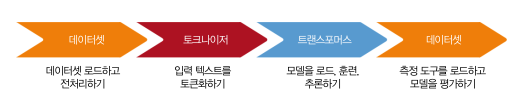

In [36]:
from datasets import load_dataset
emotions = load_dataset("SetFit/emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

In [48]:
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6, 
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

emotions["train"].features['label'].__class__

datasets.features.features.Value

In [49]:
ClassLabel(
    num_classes=6, 
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [38]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [39]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 16000
})

In [40]:
len(train_ds)

16000

In [41]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0, 'label_text': 'sadness'}

In [42]:
train_ds.column_names

['text', 'label', 'label_text']

In [43]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None),
'label_text': Value(dtype='string', id=None)}


In [44]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3], 'label_text': ['sadness', 'sadness',
'anger', 'love', 'anger']}


In [45]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned
hopeful just from being around someone who cares and is awake', 'im grabbing a
minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the
fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [46]:
import pandas as pd
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [47]:
emotions["train"].features['label'].__class__

datasets.features.features.Value

In [51]:
df['label_name'] = df['label'].astype(str) 
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,0
1,i can go from feeling so hopeless to so damned...,0,sadness,0
2,im grabbing a minute to post i feel greedy wrong,3,anger,3
3,i am ever feeling nostalgic about the fireplac...,2,love,2
4,i am feeling grouchy,3,anger,3


In [52]:
emotions.reset_format()

In [53]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [54]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [55]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [56]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [57]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [58]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [59]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
# -----

In [60]:
# 전체 데이터셋 토큰화 함수
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# 토크나이저를 샘플 배치에 적용, padding=true로 지정하면 배치에 있는 가장 긴 샘플 크기에 맞춰서 샘플을
# 0으로 패딩, truncation=True로 설정하면 모델의 최대 문맥 크기에 맞춰 샘플을 잘라냄
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [61]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [62]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

텍스트 분류 모델 훈련

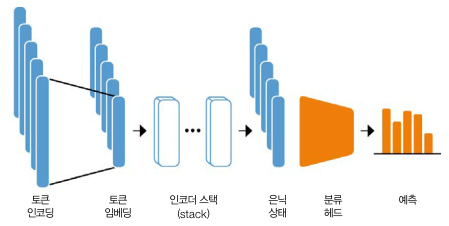

In [14]:
# 토큰 인코딩 : 원핫벡터  2만 ~ 2백만개의 고유 토큰
# 차원 축소 => 토큰 임베딩
# 은닉상태를 특성으로 사용해 분류 모델을 훈련 --> 특성 추출
# 미세튜닝 : 사전 훈련된 모델의 파라메터를 업데이트 하기 위해 전체 모델을 엔드 투 엔드로 훈련

 트랜스포머를 특성 추출기로 사용

 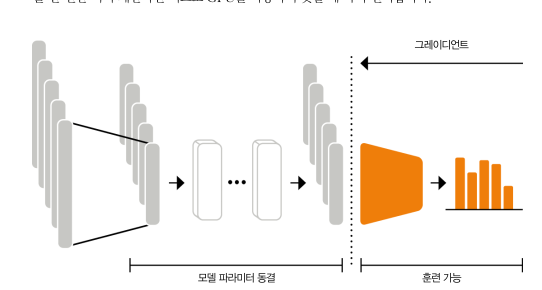

In [63]:
import torch
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [64]:
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

In [65]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

마지막 은닉상태 추출

In [67]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')

In [17]:
print(f"입력텐서의 크기는 : {inputs['input_ids'].size()}")

입력텐서의 크기는 : torch.Size([1, 6])


In [18]:
# [batch_size, n_tokens]
# 인코딩된 텐서 --> 모델이 잇는 장치로 옮기고 입력으로전달

In [68]:
inputs = {k : v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)  

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [69]:
# 은닉상태의 크기를 확인해 보기
outputs.last_hidden_state.size()
# [batch_size, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [70]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [71]:
# 위의 코드를 함수로 다시표현
def extract_hidden_states(batch):
  # 모델 입력을 GPU로 옮김
  inputs = {k : v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names }
  # 마지막 은닉상태를 추출
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #[CLS]토큰에 대한 백터를 반환
  return {"hidden_state" :  last_hidden_state[:,0].cpu().numpy()}

In [73]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)
  
emotions_encoded =  emotions.map(tokenize,batched=True,batch_size=None)
emotions_encoded

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [75]:
emotions_encoded.set_format('torch',columns=['input_ids','attention_mask','label'])

In [76]:
# 모든 분할에 대한 은닉상태를 추출
emotion_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [77]:
# 배치사이즈를 지정하지 않으면 기본 1000이다...
emotion_hidden['train'].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state']

In [79]:
emotion_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [80]:
import numpy as np
x_train = np.array(emotion_hidden['train']['hidden_state'])
x_valid = np.array(emotion_hidden['validation']['hidden_state'])
y_train = np.array(emotion_hidden['train']['label'])
y_valid = np.array(emotion_hidden['validation']['label'])
x_train.shape, x_valid.shape

((16000, 768), (2000, 768))

In [82]:
# 은닉상태의 모델을 훈련하기전에 분류하려는 감정에 대한 적당한 표현을 제공하는지 시각화
# train dataset 시각화
# 768 차원을 시각화?--> UMAP 알고리즘을 사용해서 2D로 시각화 -> 특성이 0,1범위에 놓일때 잘 동작
# 사이킷런의 minmaxsclaer를 이용 적용
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x_train)
mapper = UMAP(n_components=2,metric='cosine').fit(x_scaled)
# 2D 임베딩 데이터 프레임
df_emb = pd.DataFrame(mapper.embedding_, columns=['x','y'])
df_emb['label'] = y_train
df_emb.head()

,x,y,label
0,4.549616,6.822734,0
1,-2.784473,6.380574,0
2,5.456921,3.330285,3
3,-2.046763,3.997254,2
4,-3.127945,4.160629,3


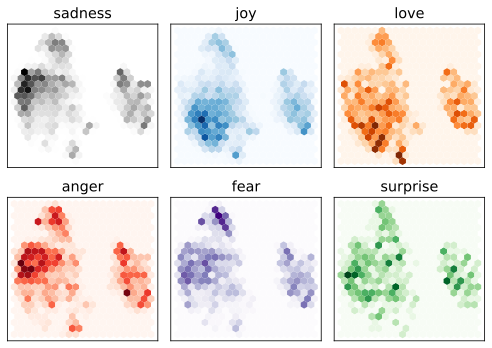

In [102]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys','Blues','Oranges','Reds','Purples','Greens']
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

for i, (label,cmap) in enumerate( zip(labels,cmaps)):
  df_emb_sub = df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["x"], df_emb_sub['y'],cmap=cmap, gridsize=20, linewidths=(0,)   )
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()  

In [98]:
emotions['train'].features['label']

Value(dtype='int64', id=None)

In [107]:
# 간단한 분류 모델 훈련
from sklearn.linear_model import LogisticRegression
logistic_lr =  LogisticRegression(max_iter=1000)
logistic_lr.fit(x_train,y_train)
logistic_lr.score(x_valid,y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6325

In [109]:
from sklearn.dummy import DummyClassifier
dc =  DummyClassifier(strategy='most_frequent')  # 무조건 가장 많이 등장하는 클래스를 분류하는 모델
dc.fit(x_train,y_train)
dc.score(x_valid,y_valid)

0.352

In [110]:
# DistilBERT 임베딩을 사용한 모델이 더 정확

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

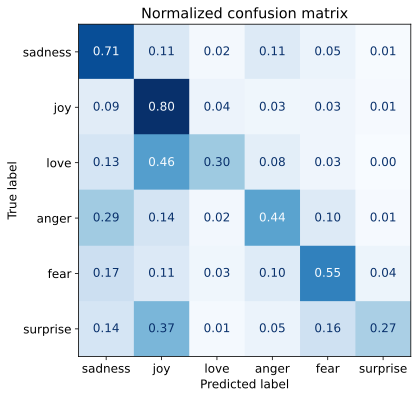

In [113]:
def confution_matrix_plot(y_pred,y_true,labels):
  cm = confusion_matrix(y_true,y_pred,normalize='true')
  fig,axes =  plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap='Blues', values_format='.2f', ax=axes, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_pred =   logistic_lr.predict(x_valid)
confution_matrix_plot(y_pred,y_valid,labels)